# Categorical Analysis

In [1]:
__author__ = "Sakshi Sharma et al."
__copyright__ = "Copyright 2019, TTC Bus Delay Data Project"
__credits__ = ["Sakshi", "Aaron", "Dennis","Sadaf", "Rahim"]
__license__ = "GPL"
__version__ = "1.0.0"
__maintainer__ = "TBD"
__email__ = "12sakshi@gmail.com"
__status__ = "Submitted for Grading"

### Import the modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")
from datetime import datetime
import calendar
startTime = datetime.now()

## Feature Creation
 - Group Route
 - Time Category

In [3]:
def group_route (r):    
    if (r>=5 and r<= 176):
        group='Regular'
    elif (r in [186, 193, 900, 902, 903, 905, 913, 924, 925, 927, 929, 935, 937, 939, 941, 944, 945, 952, 953, 954, 960, 984, 985, 986, 989, 995]):
        group='Express'
    elif (r in [141, 142, 143, 144, 145]):
        group= 'DTExpress'
    elif (r in [300, 302, 307, 312, 315, 320, 322, 324, 325, 329, 332, 334, 335, 336, 337, 339, 341, 343, 352, 353, 354, 363, 365, 384, 385, 395, 396]):
        group = 'Night'
    elif (r in [400, 402, 403, 404, 405, 407]):
        group = 'Community'
    elif (r in [1,2,3,4]):
        group='Subway'
    else:
        group='Other'
    return group

def get_time (t):
    if (t.hour<6 and t.hour>=0):
        Session= 'midnight'
    elif (t.hour >=6 and t.hour<12 ):
        Session = 'morning'
    elif (t.hour >=12 and t.hour<16):
        Session = 'afternoon'
    elif (t.hour>=16 and t.hour <20):
        Session = 'evening'
    else:
        Session = 'night'
    return Session

# Section 2
# Read CSV Data
Drop the following columns from this analysis - 
    - **Vehicle**
    - **Direction**
    - **Location**
Rename the columns from this analysis - 
    - 'Route','Time','Day','Incident','MinDelay','MinGap'

In [4]:
df = pd.read_csv('combined.csv', sep = ',')
DropCols = ['Vehicle','Direction','Location','Day']
df.drop(columns= DropCols , inplace = True)

df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = [datetime.time(d) for d in df['Time']]

df['Report Date'] = pd.to_datetime(df['Report Date'])

df['Weekday'] = df['Report Date'].dt.day_name()

df['Year'] = pd.DatetimeIndex(df['Report Date']).year

df['Month'] = pd.DatetimeIndex(df['Report Date']).month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

df['Date'] = pd.DatetimeIndex(df['Report Date']).day
df.set_index('Report Date', inplace = True)

ColName = ['Route','Time','Incident','MinDelay','MinGap','WeekDay','Year','Month','Date']
df.columns = ColName

In [5]:
df['RouteGroup']= df.Route.apply(group_route)
df['Session']= df.Time.apply(get_time)

In [6]:
df.head(2)

,Route,Time,Incident,MinDelay,MinGap,WeekDay,Year,Month,Date,RouteGroup,Session
Report Date,,,,,,,,,,,
2014-01-01,95,00:23:00,Mechanical,10.0,20.0,Wednesday,2014,Jan,1,Regular,midnight
2014-01-01,102,00:55:00,General Delay,33.0,66.0,Wednesday,2014,Jan,1,Regular,midnight


# Preliminary Analysis
### Running the information on the entire data set
In this scenario all the seasonal or cyclical trends have been ignored

In [7]:
data = df

### Root Cause - 
- Primary Reasons for Delays

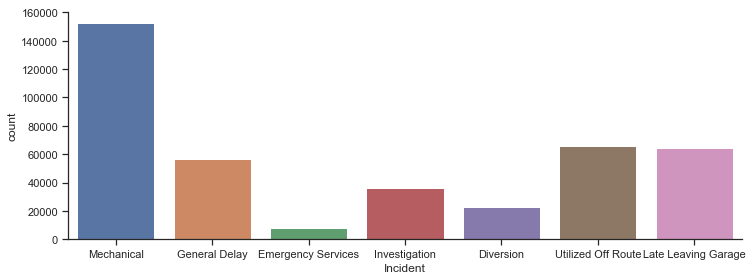

In [8]:
ht = 4
asp = 2.6
g1 = sns.catplot(x='Incident', data=data, kind='count', height=ht, aspect=asp)
g1.savefig("0-1.png")

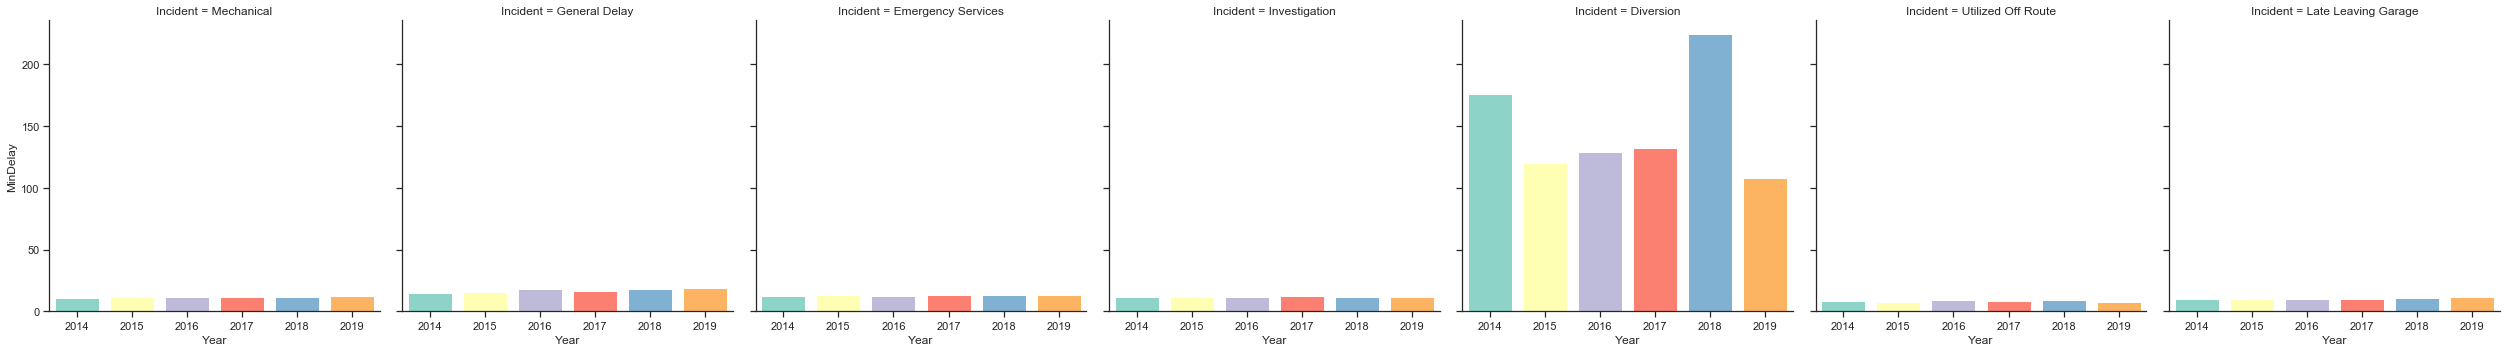

In [9]:
# plt.figure(figsize=(7,5))
g2 = sns.catplot(x="Year", y="MinDelay", col="Incident", data=data, saturation=1, kind="bar", ci=None, aspect=1, palette="Set3")
g2.despine(left = False)
g2.savefig("0-2.png")

- TTC does not have control over Diversion as these are usually due to road accidents, closures due to construction etc.
 
- Statistical Data on Min Delay

<Figure size 504x360 with 0 Axes>

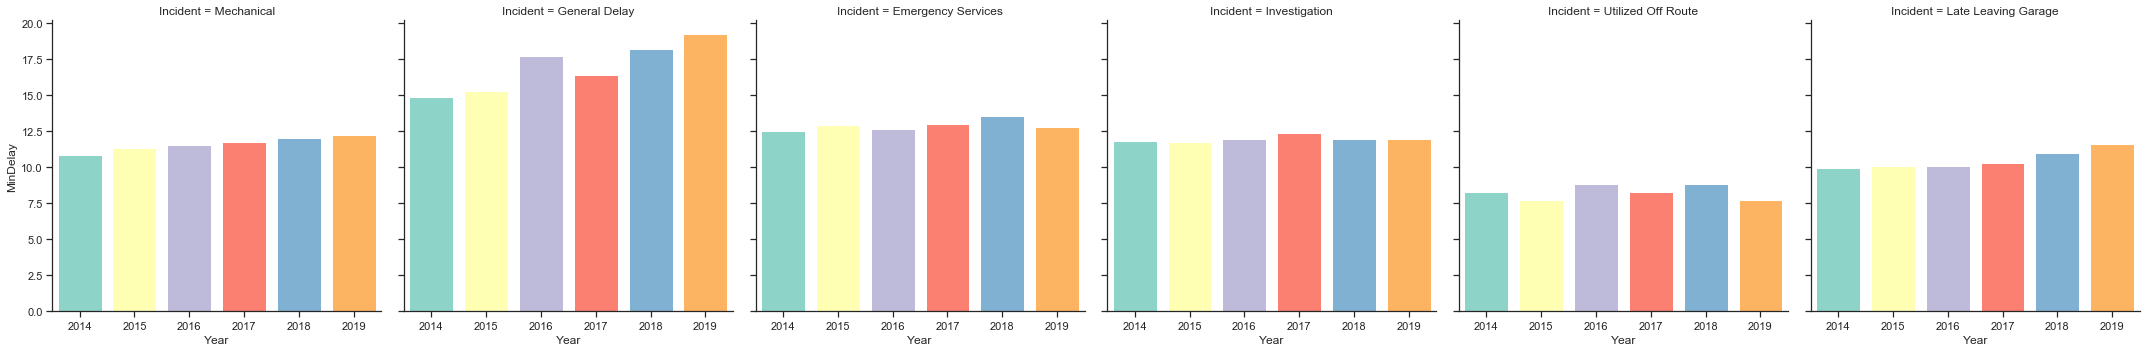

In [10]:
plt.figure(figsize=(7,5))
g2 = sns.catplot(x="Year", y="MinDelay", col="Incident", data=data[data.Incident != 'Diversion'], saturation=1, kind="bar", ci=None, aspect=1, palette="Set3")
g2.despine(left = False)
g2.savefig("0-3.png")

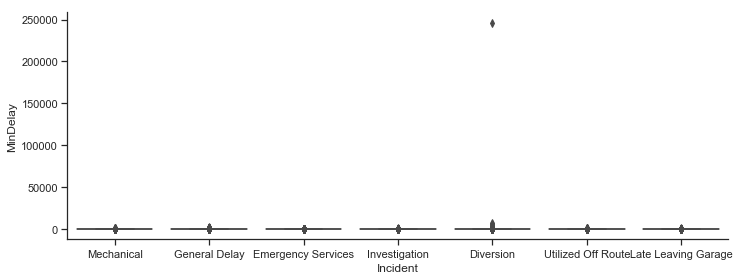

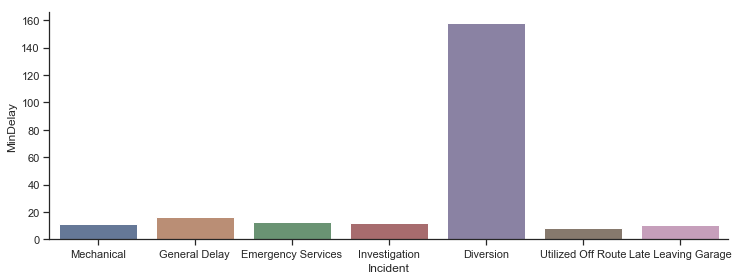

In [11]:
g2 = sns.catplot(x='Incident',y = 'MinDelay', data=data, kind='box', height=ht, aspect=asp)
g3 = sns.catplot(x='Incident', y='MinDelay',data=data, saturation=.5,kind="bar", ci=None, height=ht, aspect=asp)
g3.savefig("0-4.png")

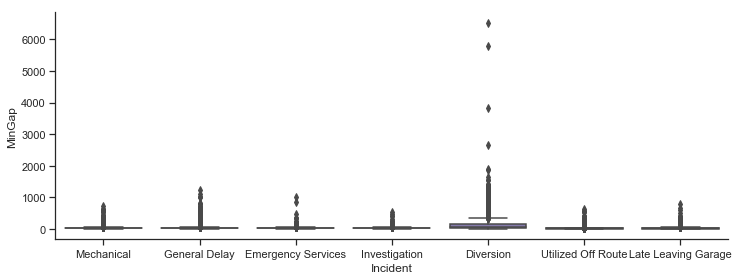

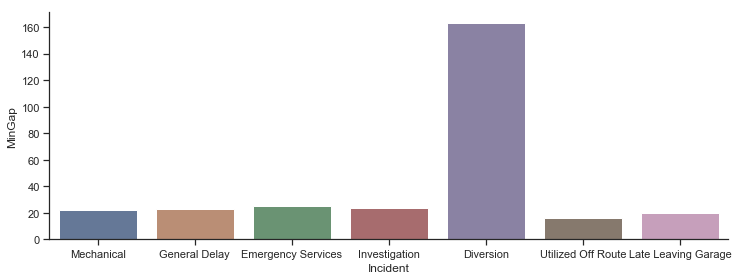

In [12]:
dg5 = sns.catplot(x='Incident', y='MinGap',data=data, saturation=.5,kind="bar", ci=None, height=ht, aspect=asp)
g5.savefig("0-5.png")
g5.savefig("0-6.png")

# Data Filter
 - It is observed that the diversion is creating dataset that has out of range MinDelay.
 - A filter is applied to the dataset to evaluate data with MinDelay < 120

In [ ]:
data.loc[(data['Year'] == 2014)].MinDelay

D:\Python\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Python\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


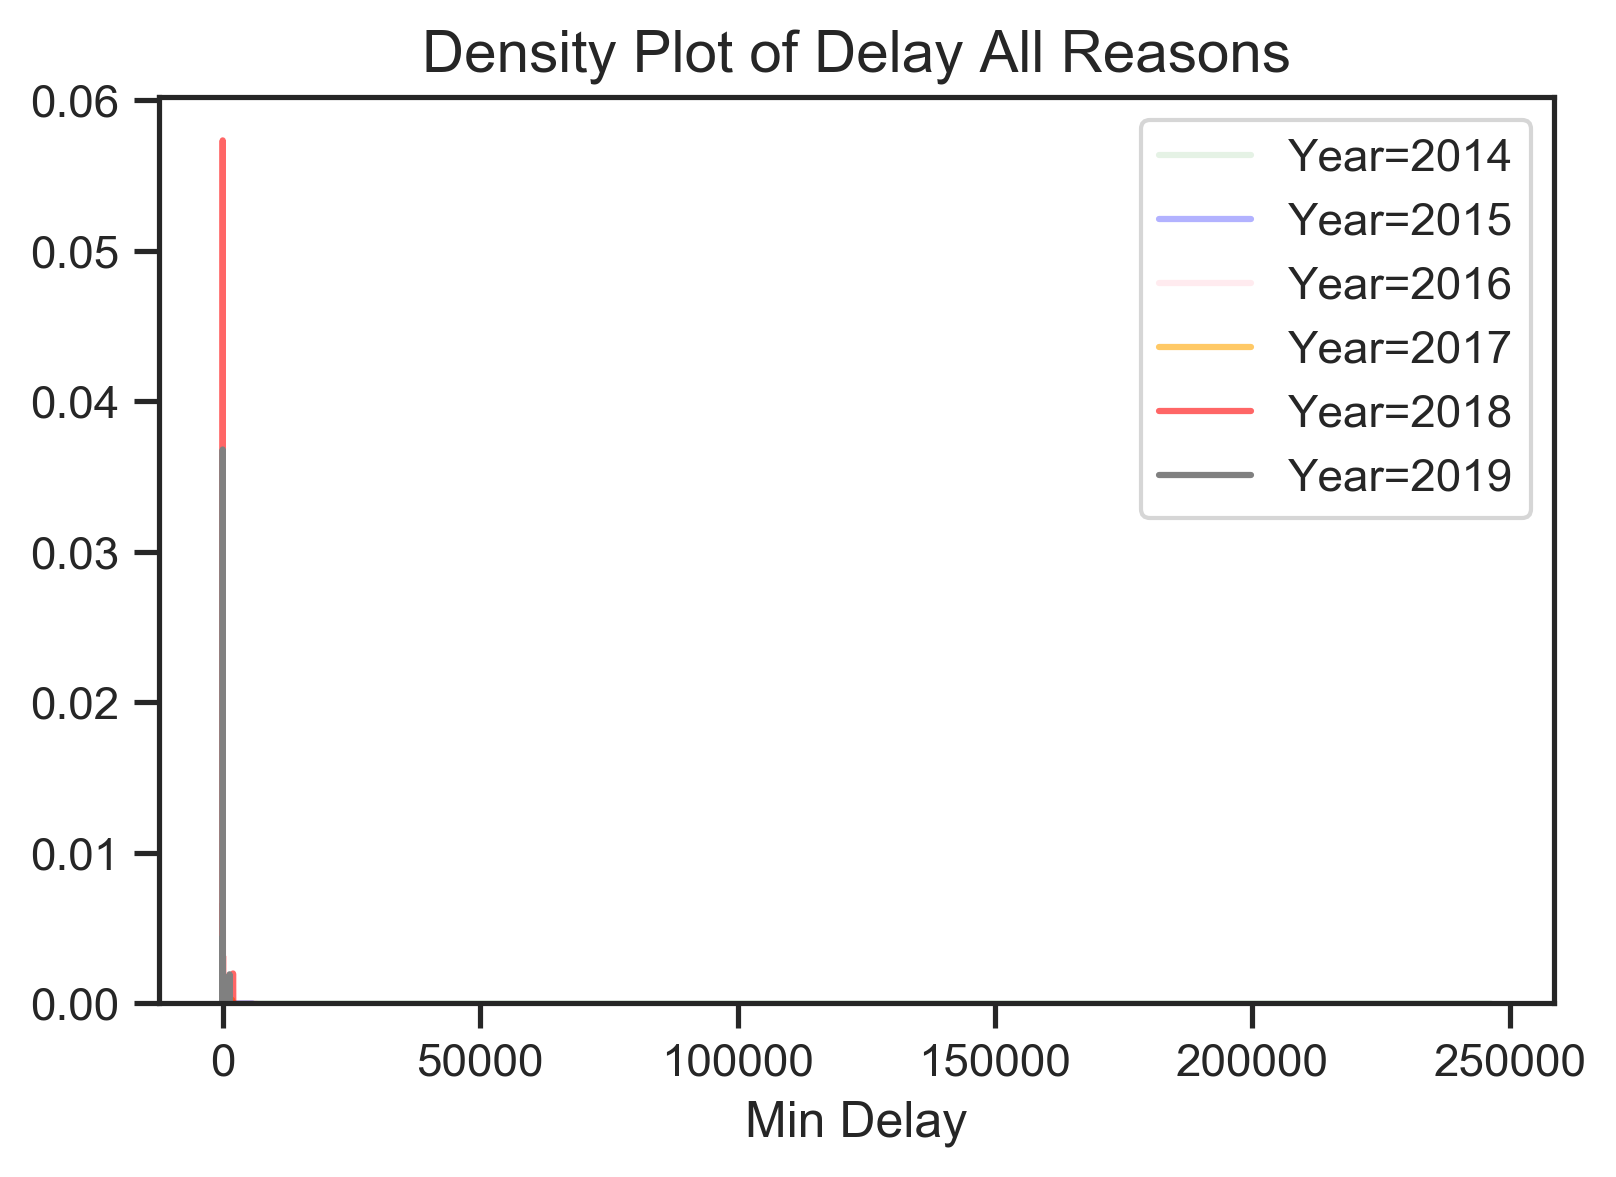

In [13]:
g6 = plt.figure(figsize=(6,4), dpi= 300)
sns.kdeplot(data.loc[(data['Year'] == 2014)].MinDelay, shade=False, color="green", label="Year=2014", alpha=0.1)
sns.kdeplot(data.loc[(data['Year'] == 2015)].MinDelay, shade=False, color="blue", label="Year=2015", alpha=0.3)
sns.kdeplot(data.loc[(data['Year'] == 2016)].MinDelay, shade=False, color="pink", label="Year=2016", alpha=0.3)
sns.kdeplot(data.loc[(data['Year'] == 2017)].MinDelay, shade=False, color="orange", label="Year=2017", alpha=0.6)
sns.kdeplot(data.loc[(data['Year'] == 2018)].MinDelay, shade=False, color="red", label="Year=2018", alpha=0.6)
sns.kdeplot(data.loc[(data['Year'] == 2019)].MinDelay, shade=False, color="grey", label="Year=2019", alpha=1)

# Decoration
plt.title('Density Plot of Delay All Reasons', fontsize=14)
plt.legend()
plt.xlabel('Min Delay')
g6.savefig("0-7.png")

In [14]:
data_no_filter = data.MinDelay.count()

In [15]:
data2 = data[(data.MinDelay <= 120) & (data.MinDelay >0)]
data_1_filter = data2.MinDelay.count()

In [16]:
# % points excluded from analysis
(data_no_filter-data_1_filter)/data_no_filter*100

2.497139644526858

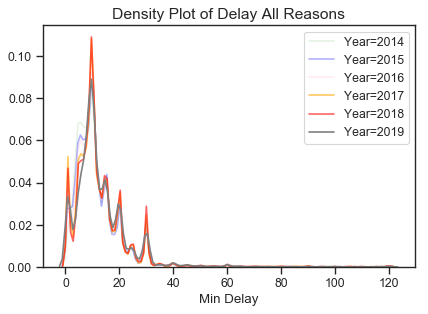

In [17]:
g7 = plt.figure(figsize=(6,4), dpi= 80)
sns.kdeplot(data2.loc[(data2['Year'] == 2014)].MinDelay, shade=False, color="green", label="Year=2014", alpha=0.1)
sns.kdeplot(data2.loc[(data2['Year'] == 2015)].MinDelay, shade=False, color="blue", label="Year=2015", alpha=0.3)
sns.kdeplot(data2.loc[(data2['Year'] == 2016)].MinDelay, shade=False, color="pink", label="Year=2016", alpha=0.3)
sns.kdeplot(data2.loc[(data2['Year'] == 2017)].MinDelay, shade=False, color="orange", label="Year=2017", alpha=0.6)
sns.kdeplot(data2.loc[(data2['Year'] == 2018)].MinDelay, shade=False, color="red", label="Year=2018", alpha=0.6)
sns.kdeplot(data2.loc[(data2['Year'] == 2019)].MinDelay, shade=False, color="grey", label="Year=2019", alpha=1)

# Decoration
plt.title('Density Plot of Delay All Reasons', fontsize=14)
plt.legend()
plt.xlabel('Min Delay')
g7.savefig("0-8.png")

## Revise the Data Filter Criteria
 - 120 still has a significantly low number of observations to the right. It is a good idea to truncate the dataset further.
 - A filter is applied to the dataset to evaluate data with MinDelay < 50

In [18]:
data2 = data[(data.MinDelay <= 50) & (data.MinDelay >0)]
data_2_filter = data2.MinDelay.count()
# % points excluded from analysis
(data_no_filter-data_2_filter)/data_no_filter*100

3.664460576410945

In [19]:
data2.MinDelay.describe()

count    390683.000000
mean         11.556052
std           7.589555
min           1.000000
25%           6.000000
50%          10.000000
75%          15.000000
max          50.000000
Name: MinDelay, dtype: float64

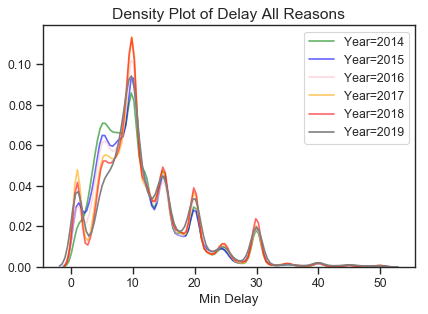

In [20]:
g8 = plt.figure(figsize=(6,4), dpi= 80)
sns.kdeplot(data2.loc[(data2['Year'] == 2014)].MinDelay, shade=False, color="green", label="Year=2014", alpha=0.6)
sns.kdeplot(data2.loc[(data2['Year'] == 2015)].MinDelay, shade=False, color="blue", label="Year=2015", alpha=0.6)
sns.kdeplot(data2.loc[(data2['Year'] == 2016)].MinDelay, shade=False, color="pink", label="Year=2016", alpha=0.6)
sns.kdeplot(data2.loc[(data2['Year'] == 2017)].MinDelay, shade=False, color="orange", label="Year=2017", alpha=0.6)
sns.kdeplot(data2.loc[(data2['Year'] == 2018)].MinDelay, shade=False, color="red", label="Year=2018", alpha=0.6)
sns.kdeplot(data2.loc[(data2['Year'] == 2019)].MinDelay, shade=False, color="grey", label="Year=2019", alpha=1)

# Decoration
plt.title('Density Plot of Delay All Reasons', fontsize=14)
plt.legend()
plt.xlabel('Min Delay')
g8.savefig("0-9.png")

# Data Analysis

## Section 3.1
Plot a Pie-plot

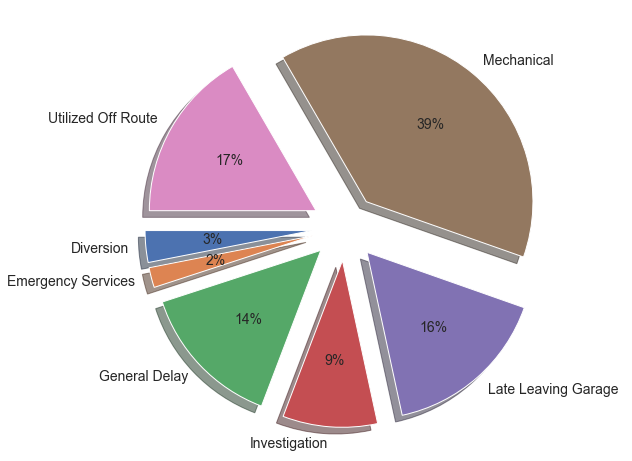

In [21]:
pieplt = pd.DataFrame(data2.groupby(data2.Incident).MinDelay.count())
fig1, ax1 = plt.subplots(figsize=(10, 8))
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
ax1.pie(pieplt.MinDelay, explode=explode, labels=pieplt.index, autopct='%0.0f%%',shadow=True, startangle= 180,
        textprops={'size':14}, radius = 0.5)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('2-1.png')
plt.show()

In [22]:
ht = 6
asp = 1.75
sns.set(style="ticks")

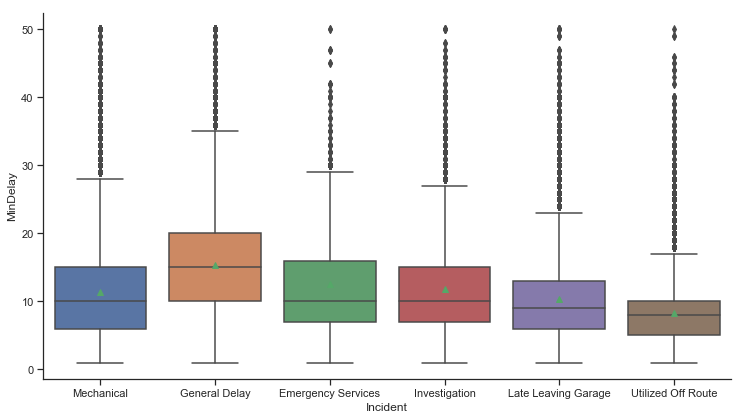

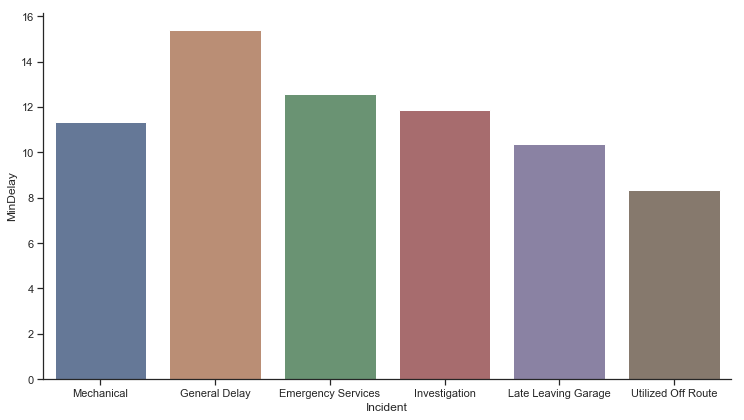

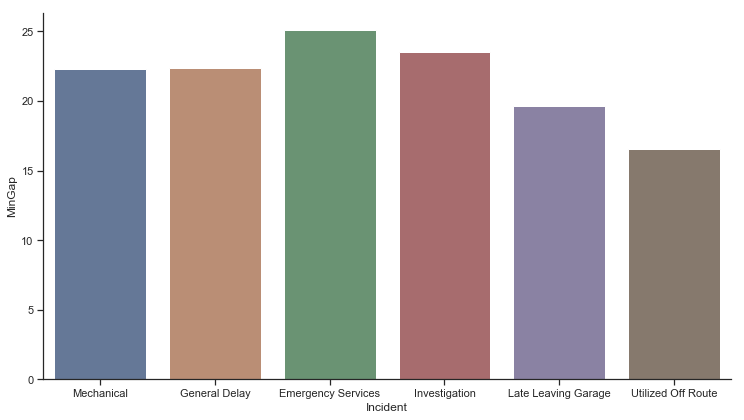

In [23]:
#d2 = sns.catplot(x='Incident', data=data2, kind='count', height=ht, aspect=asp, palette="Set3")
d3 = sns.catplot(x='Incident',y = 'MinDelay', data=data2[data2.Incident != 'Diversion'], kind='box', height=ht, aspect=asp, showmeans=True )
d4 = sns.catplot(x='Incident', y='MinDelay',data=data2[data2.Incident != 'Diversion'], saturation=.5,kind="bar", ci=None, height=ht, aspect=asp)
d5 = sns.catplot(x='Incident', y='MinGap',data=data2[data2.Incident != 'Diversion'], saturation=.5,kind="bar", ci=None, height=ht, aspect=asp)
#d2.savefig("1-2.png")
d3.savefig("2-2.png")
d4.savefig("2-2.png")
d5.savefig("2-3.png")

In [24]:
data2[data2.Incident != 'Diversion'].groupby('Incident').MinDelay.mean()

Incident
Emergency Services     12.566737
General Delay          15.383288
Investigation          11.865077
Late Leaving Garage    10.386417
Mechanical             11.328860
Utilized Off Route      8.347603
Name: MinDelay, dtype: float64

In [25]:
data2[data2.Incident != 'Diversion'].groupby('Year').MinDelay.mean()

Year
2014    11.000592
2015    11.044389
2016    11.275440
2017    11.441632
2018    11.862729
2019    12.101453
Name: MinDelay, dtype: float64

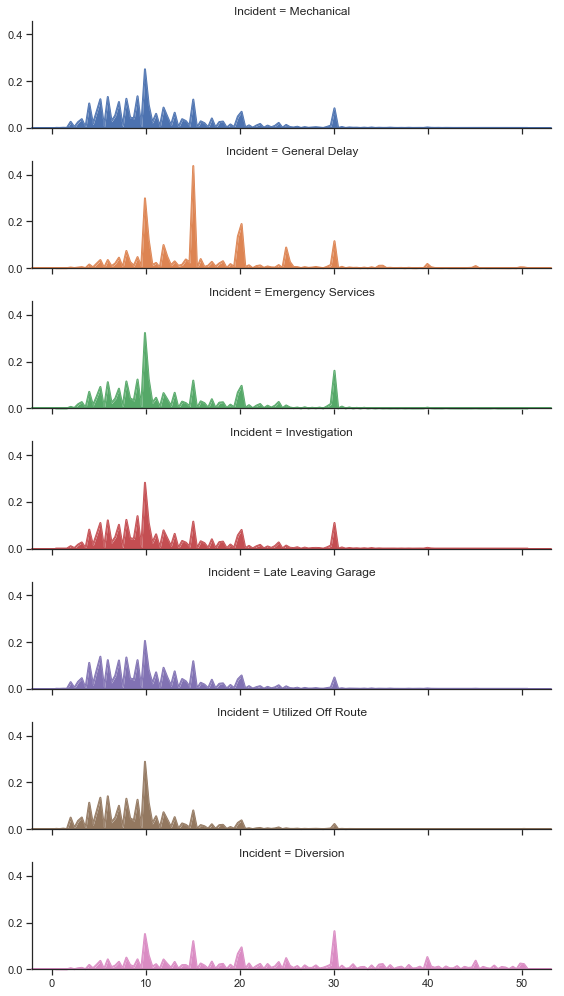

In [26]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(6, rot=-.25, light=1)
d6 = sns.FacetGrid(data2, row="Incident", hue="Incident", aspect=4, height=2)

# Draw the densities in a few steps
d6.map(sns.kdeplot, 'MinDelay', clip_on=False, shade=True, alpha=1, lw=2, bw=.2)
d6.map(sns.kdeplot, 'MinDelay', clip_on=False, color="w", lw=0.1, bw=.2)
d6.map(plt.axhline, y=0, lw=2, clip_on=False)
d6.savefig("2-4.png")

# Analytical Points
The data above suggests that either demand was greater on another route or demand was lower than anticpated in the current route. Therefore the TTC vehicle(s) was moved to another location. Further more, this created larger delays in TTC service than any other reasons specified.
- Utilized Off Route

Further Analysis
1. Category of failure with year
2. Category of failure with route
3. Category of failure with service time

## Section 3.1.1 
### Mechanical Failures & Associated Delays with year

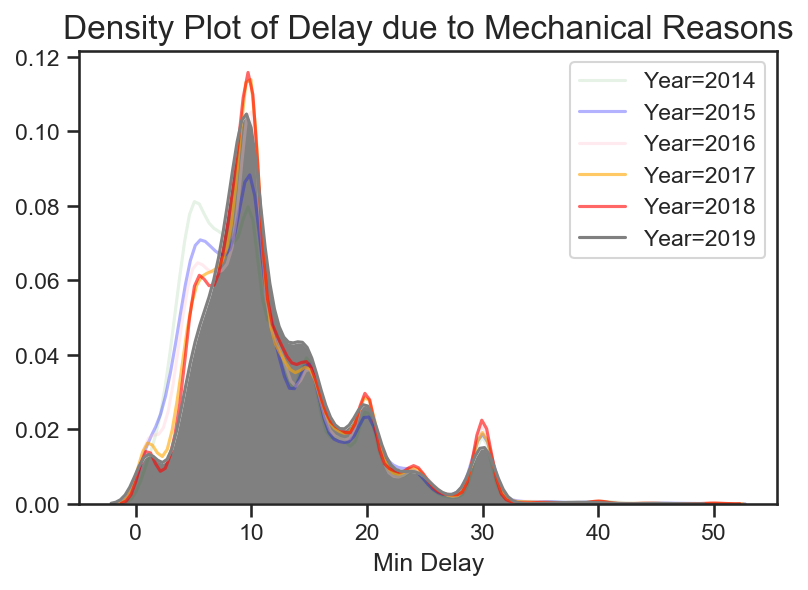

In [27]:
plt.figure(figsize=(6,4), dpi= 150)
reason = 'Mechanical'
sns.kdeplot(data2.loc[(data2['Year'] == 2014) & (data2['Incident'] == reason)].MinDelay, shade=False, color="green", label="Year=2014", alpha=0.1)
sns.kdeplot(data2.loc[(data2['Year'] == 2015) & (data2['Incident'] == reason)].MinDelay, shade=False, color="blue", label="Year=2015", alpha=0.3)
sns.kdeplot(data2.loc[(data2['Year'] == 2016) & (data2['Incident'] == reason)].MinDelay, shade=False, color="pink", label="Year=2016", alpha=0.3)
sns.kdeplot(data2.loc[(data2['Year'] == 2017) & (data2['Incident'] == reason)].MinDelay, shade=False, color="orange", label="Year=2017", alpha=0.6)
sns.kdeplot(data2.loc[(data2['Year'] == 2018) & (data2['Incident'] == reason)].MinDelay, shade=False, color="red", label="Year=2018", alpha=0.6)
sns.kdeplot(data2.loc[(data2['Year'] == 2019) & (data2['Incident'] == reason)].MinDelay, shade=True, color="grey", label="Year=2019", alpha=1)

# Decoration
plt.title('Density Plot of Delay due to Mechanical Reasons', fontsize=16)
plt.legend()
plt.xlabel('Min Delay')
plt.savefig("3-1.png")

<Figure size 560x400 with 0 Axes>

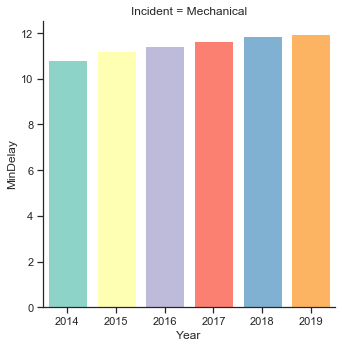

In [28]:
plt.figure(figsize=(7,5), dpi= 80)
dd1 = sns.catplot(x="Year", y="MinDelay", col="Incident", data=data2[data2.Incident == reason], saturation=1, kind="bar", ci=None, aspect=1, palette="Set3")
dd1.savefig("3-2.png")

<Figure size 560x400 with 0 Axes>

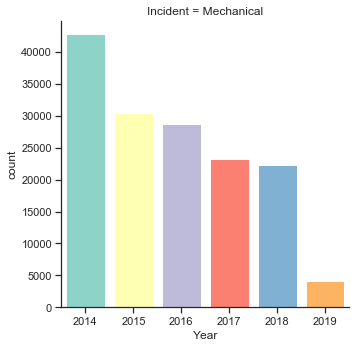

In [29]:
plt.figure(figsize=(7,5), dpi= 80)
dd2 = sns.catplot(x="Year", col="Incident", data=data2[data2.Incident == reason], saturation=1, kind="count", ci=None, aspect=1, palette="Set3")
dd2.savefig("3-3.png")

### Mechanical Failure & Route

<Figure size 720x720 with 0 Axes>

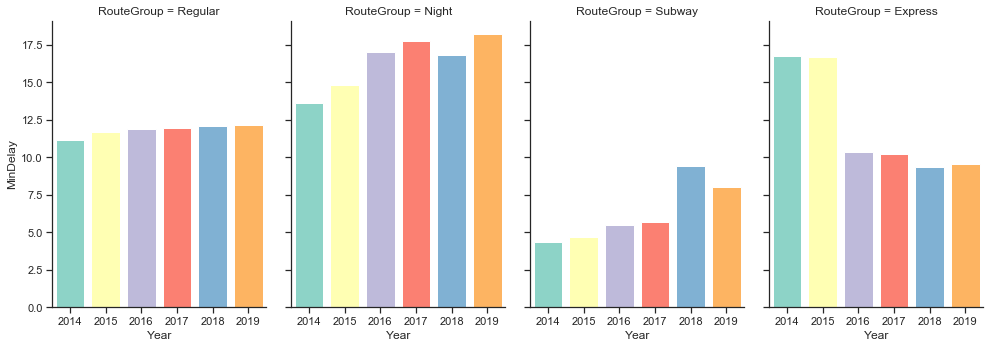

In [30]:
plt.figure(figsize=(10,10))
dd3 = sns.catplot(x="Year", y="MinDelay", col="RouteGroup", data=data2[(data2.Incident == reason)&(data2.RouteGroup!='Other')], saturation=1, kind="bar", ci=None, aspect=0.7, palette="Set3")
dd3.savefig("3-4.png")

<Figure size 2160x720 with 0 Axes>

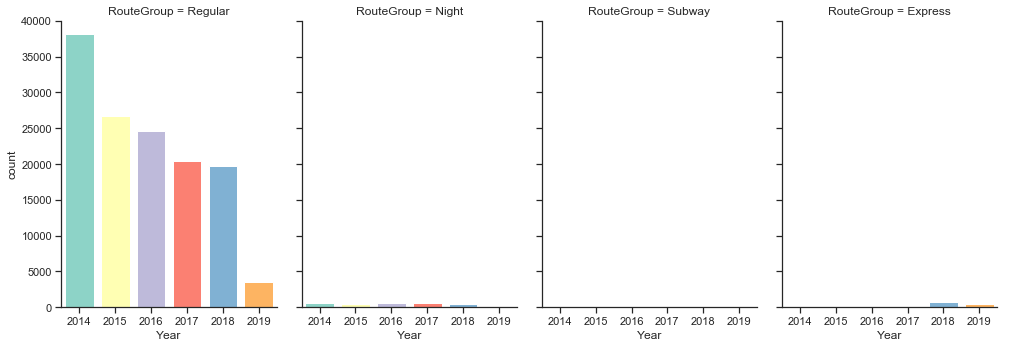

In [31]:
plt.figure(figsize=(30,10))
dd4 = sns.catplot(x="Year", col="RouteGroup", data=data2[(data2.Incident == reason)&(data2.RouteGroup!='Other')], saturation=1, kind="count", ci=None, aspect=.7, palette="Set3")
dd4.savefig("3-5.png")

### Mechanical Failure & Session

<Figure size 504x360 with 0 Axes>

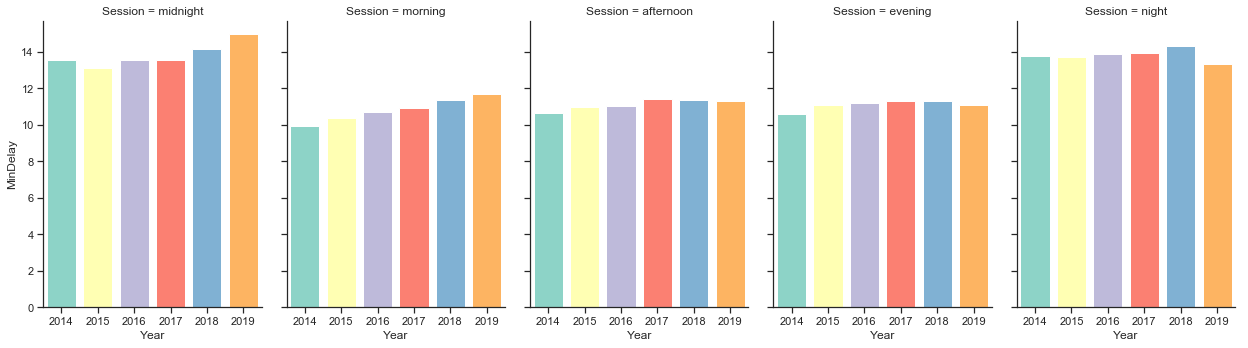

In [32]:
plt.figure(figsize=(7,5))
dd5 = sns.catplot(x="Year", y="MinDelay", col="Session", data=data2[(data2.Incident == reason)], saturation=1, kind="bar", ci=None, aspect=0.7, palette="Set3")
dd5.despine(left = False)
dd5.savefig("3-6.png")

<Figure size 504x360 with 0 Axes>

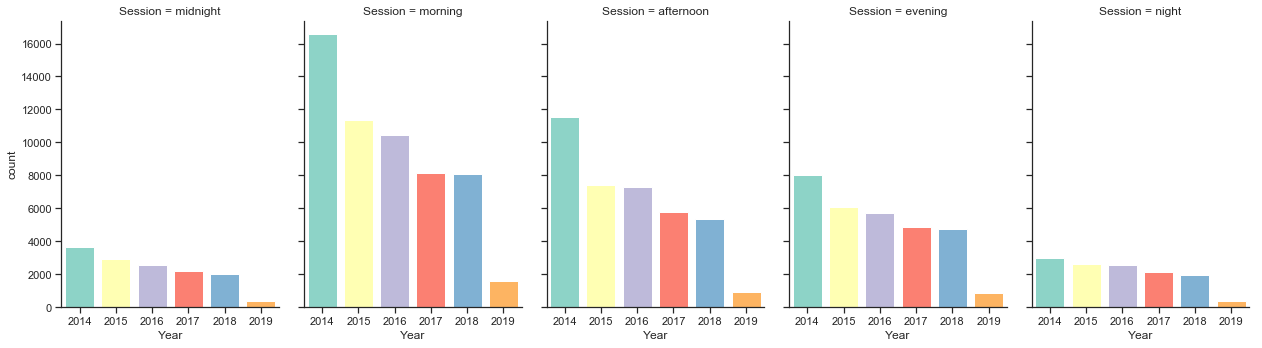

In [33]:
plt.figure(figsize=(7,5))
dd6 = sns.catplot(x="Year", col="Session", data=data2[(data2.Incident == reason)], saturation=1, kind="count", ci=None, aspect=.7, palette="Set3")
dd6.despine(left = False)
dd6.savefig("3-7.png")

## Section 3.1.2
### Late  Leaving Garage & Associated Delays with year

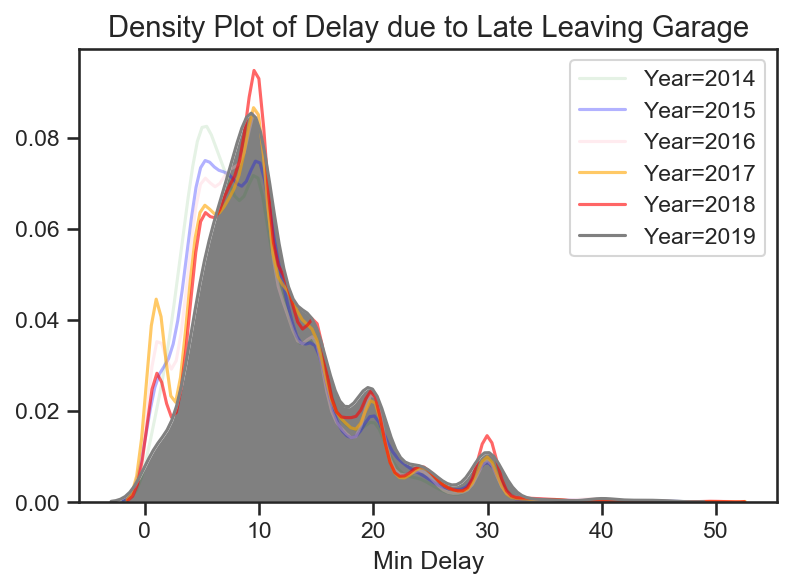

In [34]:
# Draw Plot
plt.figure(figsize=(6,4), dpi = 150)
reason = 'Late Leaving Garage'
sns.kdeplot(data2.loc[(data2['Year'] == 2014) & (data2['Incident'] == reason)].MinDelay, shade=False, color="green", label="Year=2014", alpha=0.1)
sns.kdeplot(data2.loc[(data2['Year'] == 2015) & (data2['Incident'] == reason)].MinDelay, shade=False, color="blue", label="Year=2015", alpha=0.3)
sns.kdeplot(data2.loc[(data2['Year'] == 2016) & (data2['Incident'] == reason)].MinDelay, shade=False, color="pink", label="Year=2016", alpha=0.3)
sns.kdeplot(data2.loc[(data2['Year'] == 2017) & (data2['Incident'] == reason)].MinDelay, shade=False, color="orange", label="Year=2017", alpha=0.6)
sns.kdeplot(data2.loc[(data2['Year'] == 2018) & (data2['Incident'] == reason)].MinDelay, shade=False, color="red", label="Year=2018", alpha=0.6)
sns.kdeplot(data2.loc[(data2['Year'] == 2019) & (data2['Incident'] == reason)].MinDelay, shade=True, color="grey", label="Year=2019", alpha=1)

# Decoration
plt.title('Density Plot of Delay due to Late Leaving Garage', fontsize=14)
plt.legend()
plt.xlabel('Min Delay')
plt.savefig("4-1.png")

<Figure size 560x400 with 0 Axes>

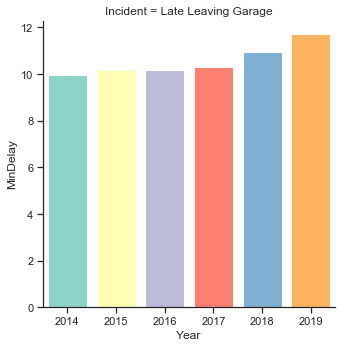

In [35]:
plt.figure(figsize=(7,5), dpi= 80)
dd7 = sns.catplot(x="Year", y="MinDelay", col="Incident", data=data2[data2.Incident == reason], saturation=1, kind="bar", ci=None, aspect=1, palette="Set3")
dd7.savefig("4-2.png")

<Figure size 560x400 with 0 Axes>

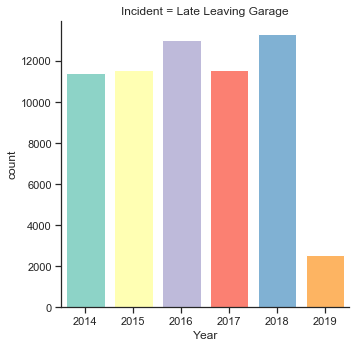

In [36]:
plt.figure(figsize=(7,5), dpi= 80)
dd8 = sns.catplot(x="Year", col="Incident", data=data2[data2.Incident == reason], saturation=1, kind="count", ci=None, aspect=1, palette="Set3")
dd8.savefig("4-3.png")

### Leaving Garage Late & Route Group 

<Figure size 504x360 with 0 Axes>

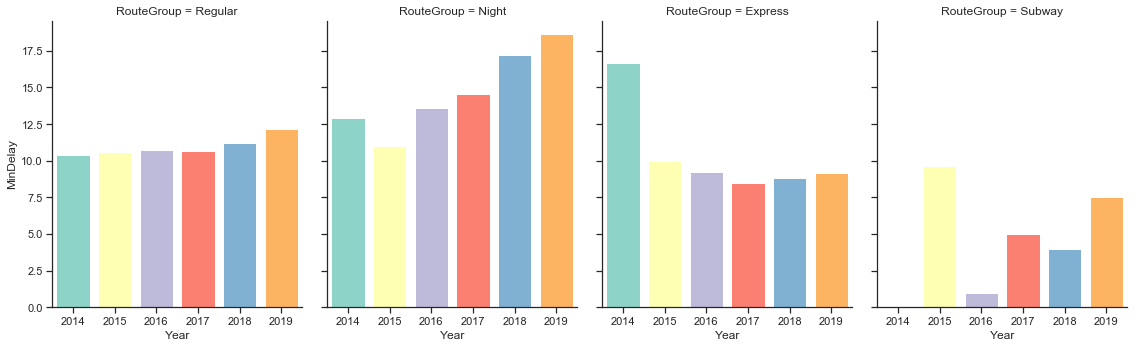

In [37]:
plt.figure(figsize=(7,5))
dd9 = sns.catplot(x="Year", y="MinDelay", col="RouteGroup", data=data2[(data2.Incident == reason) &(data2.RouteGroup != "Other") ], saturation=1, kind="bar", ci=None, aspect=.8, palette="Set3")
dd9.savefig("4-4.png")

<Figure size 504x360 with 0 Axes>

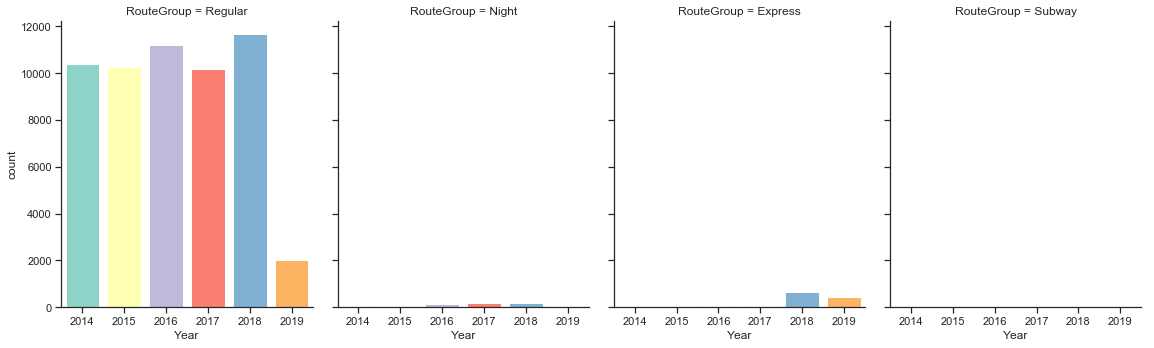

In [38]:
plt.figure(figsize=(7,5))
dd10 = sns.catplot(x="Year", col="RouteGroup", data=data2[(data2.Incident == reason) &(data2.RouteGroup != "Other") ], saturation=1, kind="count", ci=None, aspect=.8, palette="Set3")
dd10.savefig("4-5.png")

### Leaving Garage Late & session

<Figure size 504x360 with 0 Axes>

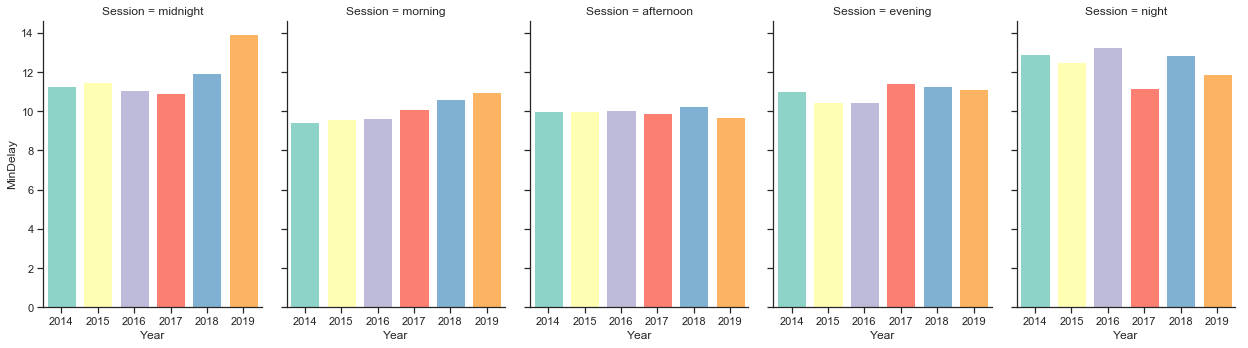

In [39]:
plt.figure(figsize=(7,5))
dd11 = sns.catplot(x="Year", y = 'MinDelay', col="Session", data=data2[(data2.Incident == reason)], saturation=1, kind="bar", ci=None, aspect=.7, palette="Set3")
dd11.savefig("4-6.png")

<Figure size 504x360 with 0 Axes>

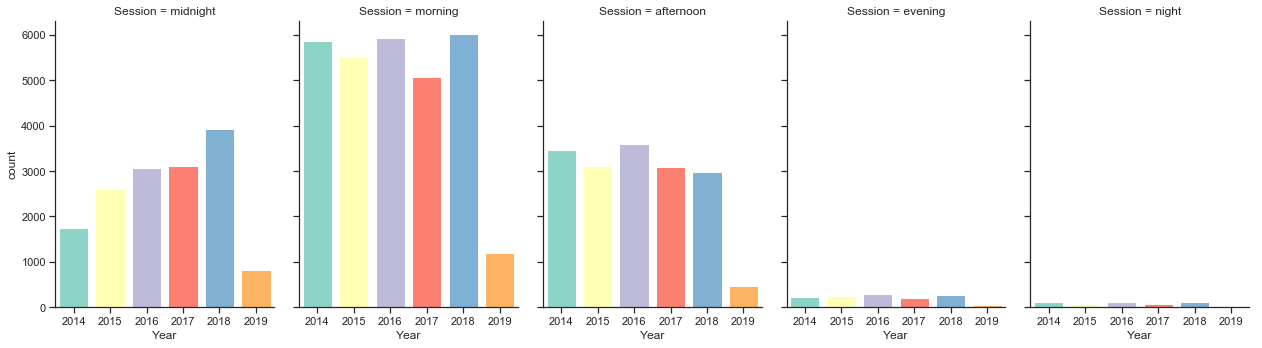

In [40]:
plt.figure(figsize=(7,5))
dd12 = sns.catplot(x="Year", col="Session", data=data2[(data2.Incident == reason)], saturation=2, kind="count", ci=None, aspect=.7, palette="Set3")
dd12.savefig("4-7.png")

In [41]:
datetime.now()-startTime 

datetime.timedelta(seconds=60, microseconds=595431)